# Basic Modeling Benchmarks
In this notebook I will benchmark various learning models using the same data without preprocessing, feature selection, and hyperparameter tuning to get a general idea for which models are performant on the multiclass classifier problem. Resampling will be used in both training and validation to ensure that minority classes get appropriate representation.

8 models that we'll consider:
* Logistic Regression
* SVC with Linear Kernel
* SVC with RBF Kernel
* k-Nearest Neighbors
* Decision Trees
* Artificial Neural Networks
* Naive Bayes
* AdaBoost


In [14]:
import ml_utils as mu
from sklearn.model_selection import train_test_split

class_names = ['Control', 'PD', 'MSA', 'PSP']

with mu.HiddenPrints():
    training_data = mu.get_training_data()
    X, y = mu.split_x_and_y(training_data)
    
    holdout_data = mu.get_holdout_data()
    X_holdout, y_holdout = mu.split_x_and_y(holdout_data)
    X_holdout, y_holdout = mu.resample_to_equal_class_sizes(X_holdout, y_holdout)
    
    valid_data = mu.get_validation_data()
    X_valid, y_valid = mu.split_x_and_y(valid_data)
    X_valid, y_valid = mu.resample_to_equal_class_sizes(X_valid, y_valid)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
----------------------------------
Cross-Validation Mean Accuracy: 0.639317
----------------------------------
Holdout Data Score: 0.506250



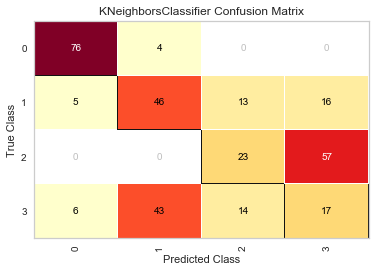


----------------------------------
Validation Data Score: 0.671875



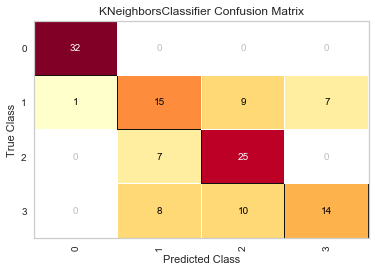


SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
----------------------------------
Cross-Validation Mean Accuracy: 0.665871
----------------------------------
Holdout Data Score: 0.668750



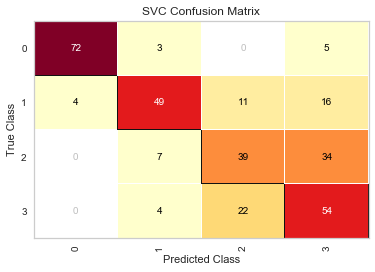


----------------------------------
Validation Data Score: 0.796875



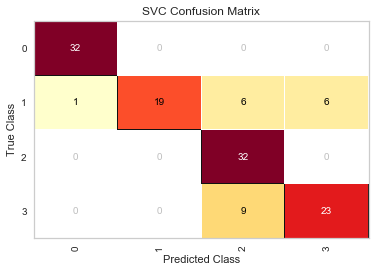


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
----------------------------------
Cross-Validation Mean Accuracy: 0.624283
----------------------------------
Holdout Data Score: 0.331250



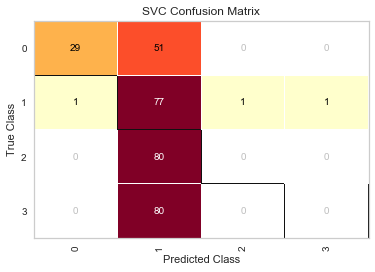


----------------------------------
Validation Data Score: 0.281250



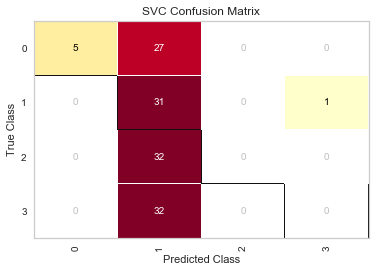

C:\Users\jtbricker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
----------------------------------
Cross-Validation Mean Accuracy: 0.856036
----------------------------------
Holdout Data Score: 0.746875



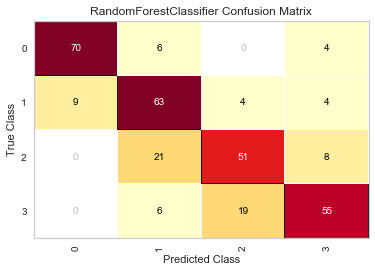


----------------------------------
Validation Data Score: 0.687500



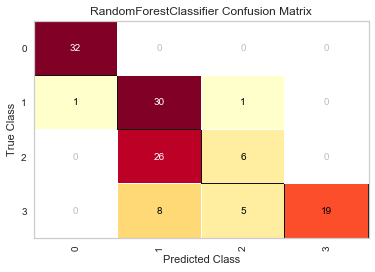


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
----------------------------------
Cross-Validation Mean Accuracy: 0.560839
----------------------------------
Holdout Data Score: 0.562500



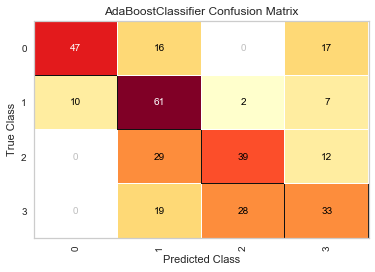


----------------------------------
Validation Data Score: 0.632812



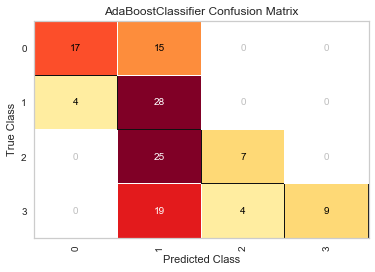


GaussianNB(priors=None)
----------------------------------
Cross-Validation Mean Accuracy: 0.766810
----------------------------------
Holdout Data Score: 0.756250



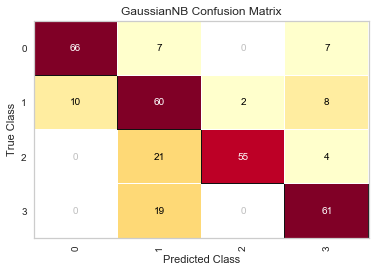


----------------------------------
Validation Data Score: 0.765625



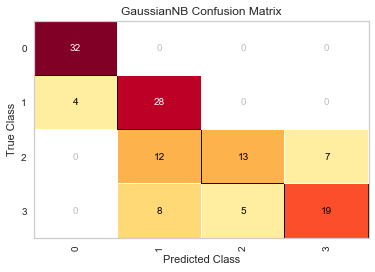


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
----------------------------------
Cross-Validation Mean Accuracy: 0.770044
----------------------------------
Holdout Data Score: 0.803125



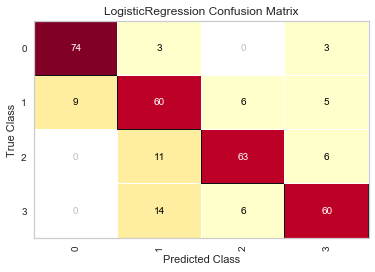


----------------------------------
Validation Data Score: 0.664062



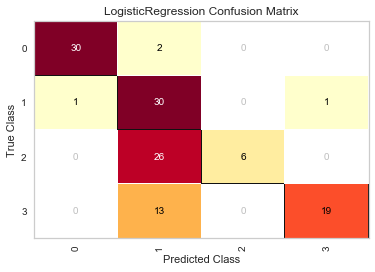


MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[25, 25, 25], learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
----------------------------------
Cross-Validation Mean Accuracy: 0.650186
----------------------------------
Holdout Data Score: 0.568750



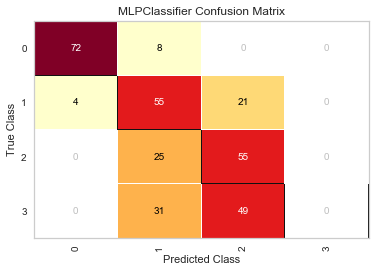


----------------------------------
Validation Data Score: 0.617188



C:\Users\jtbricker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


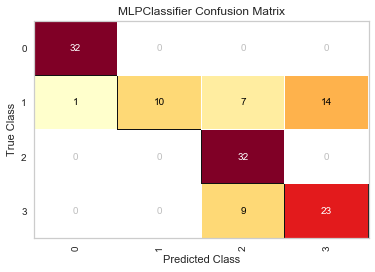

In [15]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import precision_recall_fscore_support

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

from yellowbrick.classifier import ConfusionMatrix

classifiers = mu.get_baseline_models()


for classifier in classifiers:
    model = classifier.get('model')
    print("=======================================================================")
    print(model)
    print('----------------------------------')
    
    pipeline = Pipeline([
        ('oversampler', RandomOverSampler()),
        ('classifier', model)
    ])
    
    cross_val_acc = cross_val_score(pipeline, X, y, cv=StratifiedKFold(5)).mean()
    print("Cross-Validation Mean Accuracy: %f" %cross_val_acc)
    classifier['cross_val_acc'] = cross_val_acc

    print('----------------------------------')
    cm = ConfusionMatrix(pipeline, classes=[0,1,2,3])
    cm.fit(X, y)
        
    holdout_acc = model.score(X_holdout, y_holdout)
    print("Holdout Data Score: %f" %holdout_acc)
    print()
    cm.score(X_holdout, y_holdout)
    cm.poof()
    precision, recall, f1, _ = precision_recall_fscore_support(y_holdout, pipeline.predict(X_holdout))
    classifier['holdout_precision'] = {i: precision[i] for i in range(len(precision))}
    classifier['holdout_recall'] = {i: recall[i] for i in range(len(recall))}
    classifier['holdout_f1'] = {i: f1[i] for i in range(len(f1))}
    classifier['holdout_acc'] = holdout_acc
    print()
    print('----------------------------------')
    valid_acc = pipeline.score(X_valid, y_valid)
    print("Validation Data Score: %f" %valid_acc)
    print()
    cm = ConfusionMatrix(pipeline, classes=[0,1,2,3])
    cm.fit(X, y)
    cm.score(X_valid, y_valid)
    cm.poof()
    precision, recall, f1, _ = precision_recall_fscore_support(y_valid, pipeline.predict(X_valid))
    classifier['valid_precision'] = {i: precision[i] for i in range(len(precision))}
    classifier['valid_recall'] = {i: recall[i] for i in range(len(recall))}
    classifier['valid_f1'] = {i: f1[i] for i in range(len(f1))}
    classifier['valid_acc'] = valid_acc
    
    print()    

__TODO__: Find some way of unpacking and visualizing this by model and class

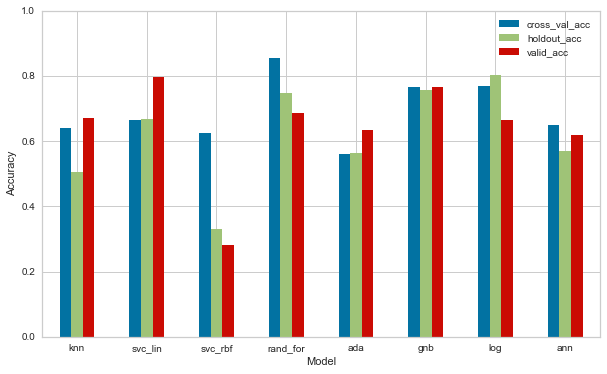

In [20]:
%matplotlib inline
import pandas as pd
cl = pd.DataFrame(classifiers)

group_labels =[c['name'] for c in classifiers]
rows = []
for g in group_labels:
    row = cl.loc[cl['name'] == g][['name','cross_val_acc', 'holdout_acc', 'valid_acc']]
    rows.append(row)
ax = pd.concat(rows).set_index('name').plot(kind='bar', figsize=(10,6), rot=0)
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_ybound((0,1))
fig = ax.get_figure()
fig.savefig('images/benchmark_accuracies')